In [2]:
!pip install dcor

In [3]:
from scipy import stats
import matplotlib.pyplot as plt

# import to read png as matrix

import numpy as np
# read image with nunpy


In [4]:
images  = []

for i in range (1, 25):
    img_path = f'./img/{i}.png'
    img = plt.imread(img_path)
    images.append(img)

# sort iamges by shape
images.sort(key=lambda x: x.shape)

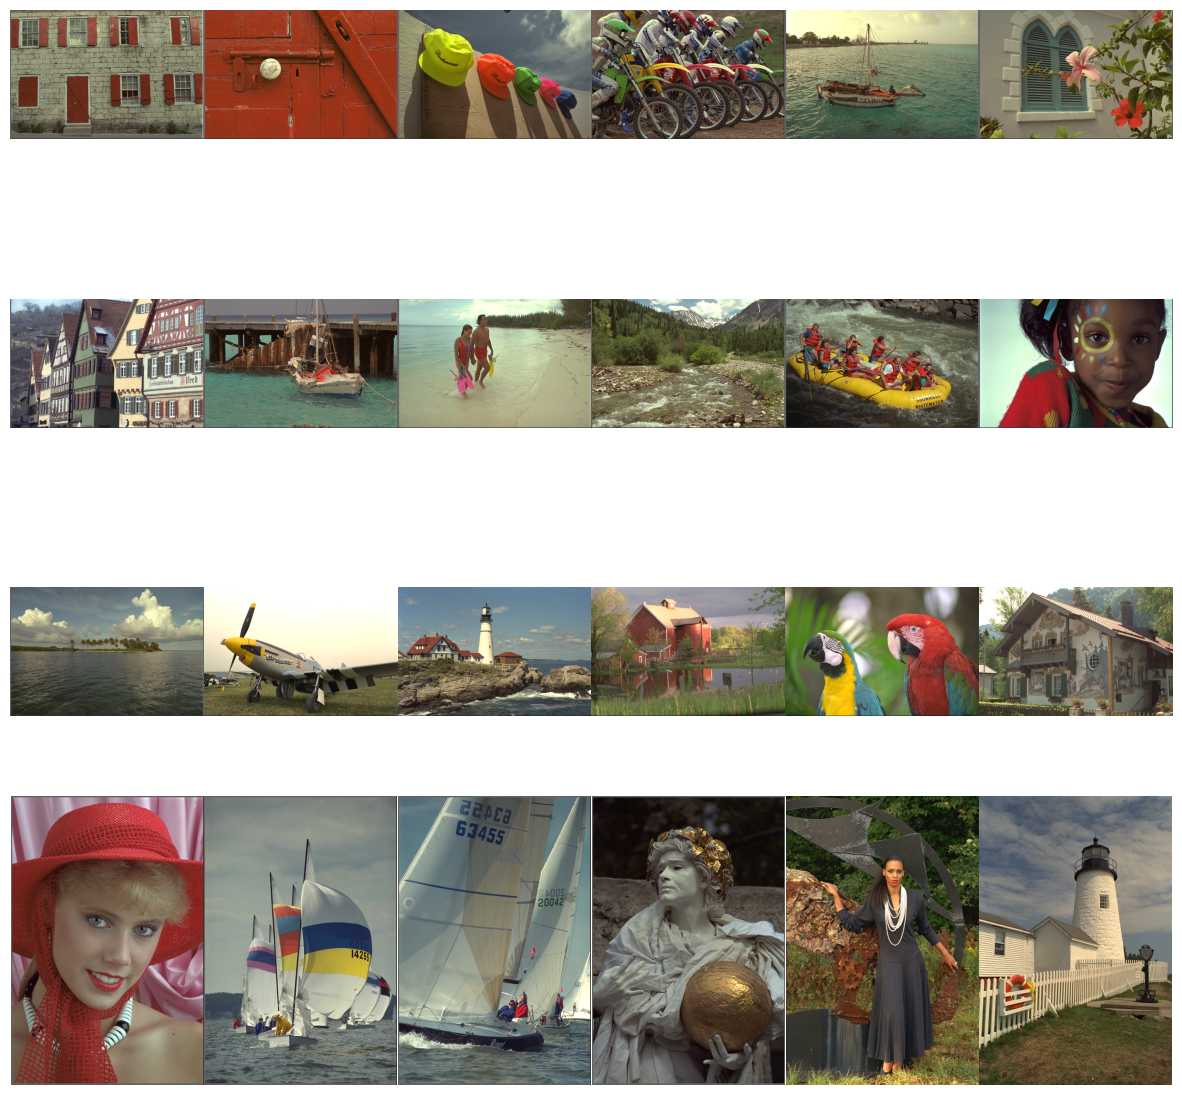

In [5]:

# plot all images together


fig, axs = plt.subplots(4, 6, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})
axs = axs.flatten()
for img, ax in zip(images, axs):
    ax.imshow(img)
    ax.axis('off')
    ax.set_aspect('equal')


# remove space between images
# fig.subplots_adjust(wspace=0, hspace=0)
#remove  vertical espace between subplots rows

plt.savefig('all_images.png', bbox_inches='tight', pad_inches=0)


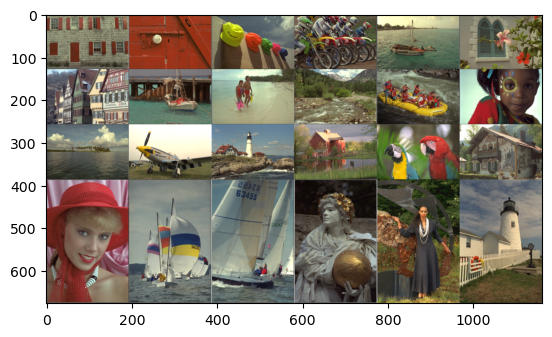

In [6]:
img_path = './all_images_grid.png'
img = plt.imread(img_path)
plt.imshow(img)

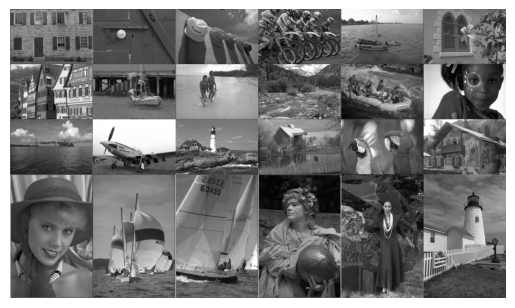

In [7]:
bw_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
plt.imshow(bw_img, cmap='gray')
# remove axis
plt.axis('off')
# remove white border
plt.savefig('all_images_grid_bw.png', bbox_inches='tight', pad_inches=0)

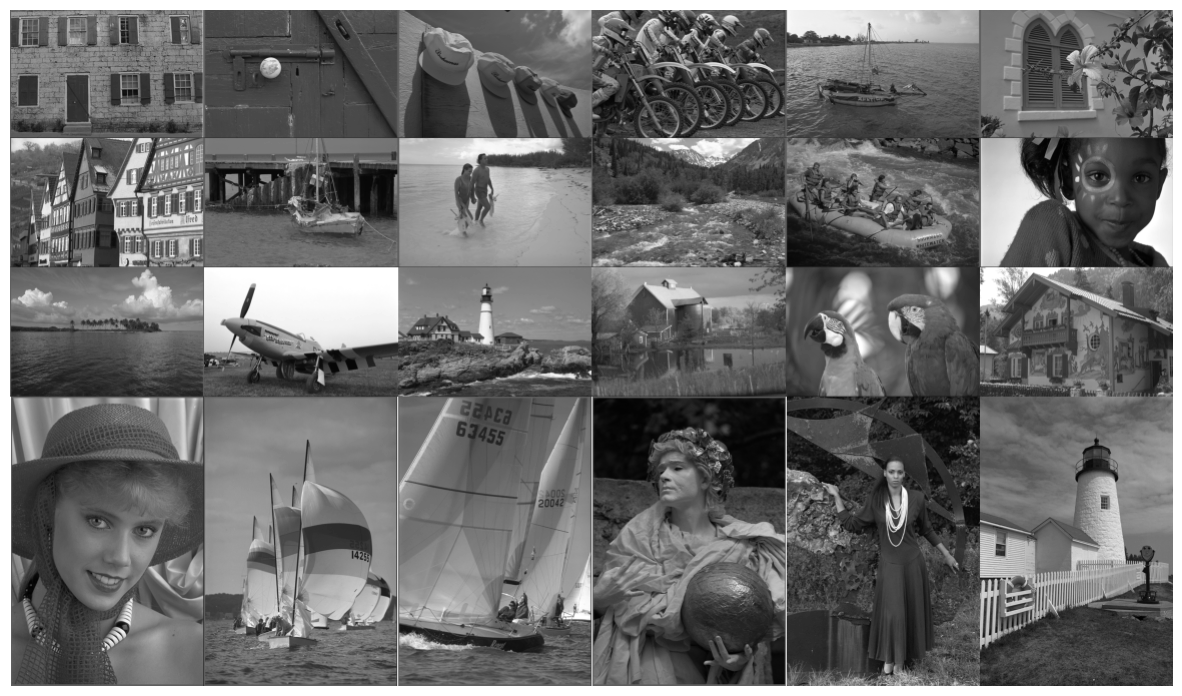

In [8]:
bw_img_mean = img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(bw_img_mean, cmap='gray')
plt.axis('off')
plt.show()

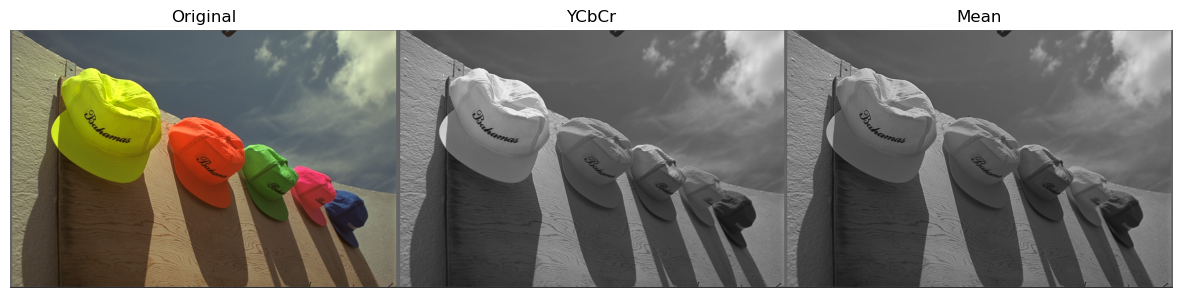

In [9]:
img_ex = images[2]
img_ex_bw = 0.299*img_ex[:,:,0] + 0.587*img_ex[:,:,1] + 0.114*img_ex[:,:,2]
img_ex_bw_mean = img_ex[:,:,0]/3 + img_ex[:,:,1]/3 + img_ex[:,:,2]/3

fig, axs = plt.subplots(1, 3, figsize=(15, 15))
axs = axs.flatten()
axs[0].imshow(img_ex)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(img_ex_bw, cmap='gray')
axs[1].set_title('YCbCr')
axs[1].axis('off')
axs[2].imshow(img_ex_bw_mean, cmap='gray')
axs[2].set_title('Mean')
axs[2].axis('off')

# remove space between images
fig.subplots_adjust(wspace=0, hspace=0)

plt.savefig('img_ex_bw.png', bbox_inches='tight', pad_inches=0)


In [10]:
images  = []

for i in range (1, 25):
    img_path = f'./img/{i}.png'
    img = plt.imread(img_path)
    images.append(img)

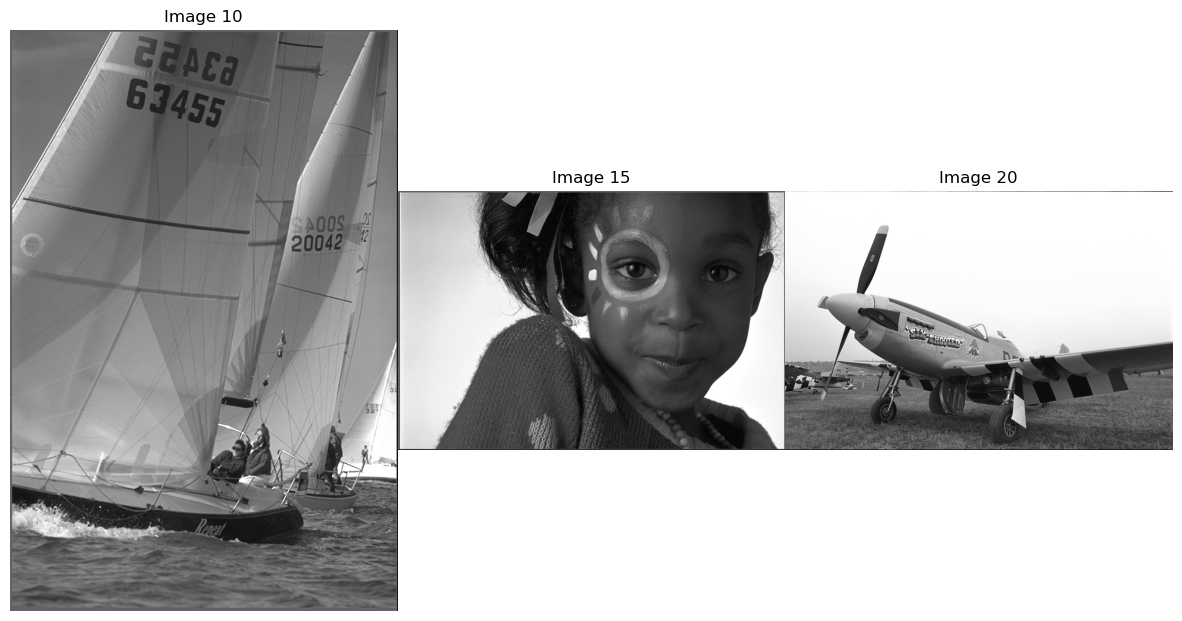

In [39]:
# plot images and its histogram together
fig, axs = plt.subplots(1, 3, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})
j=0

for i in [10,15,20]:
    img_path = f'./img/{i}.png'
    img = plt.imread(img_path)

    img_bw = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    axs[j].imshow(img_bw, cmap='gray')
    axs[j].axis('off')
    axs[j].set_aspect('equal')
    # add title
    axs[j].set_title(f'Image {i}')
    j+=1

# save
plt.savefig('img_example.png', bbox_inches='tight', pad_inches=0)


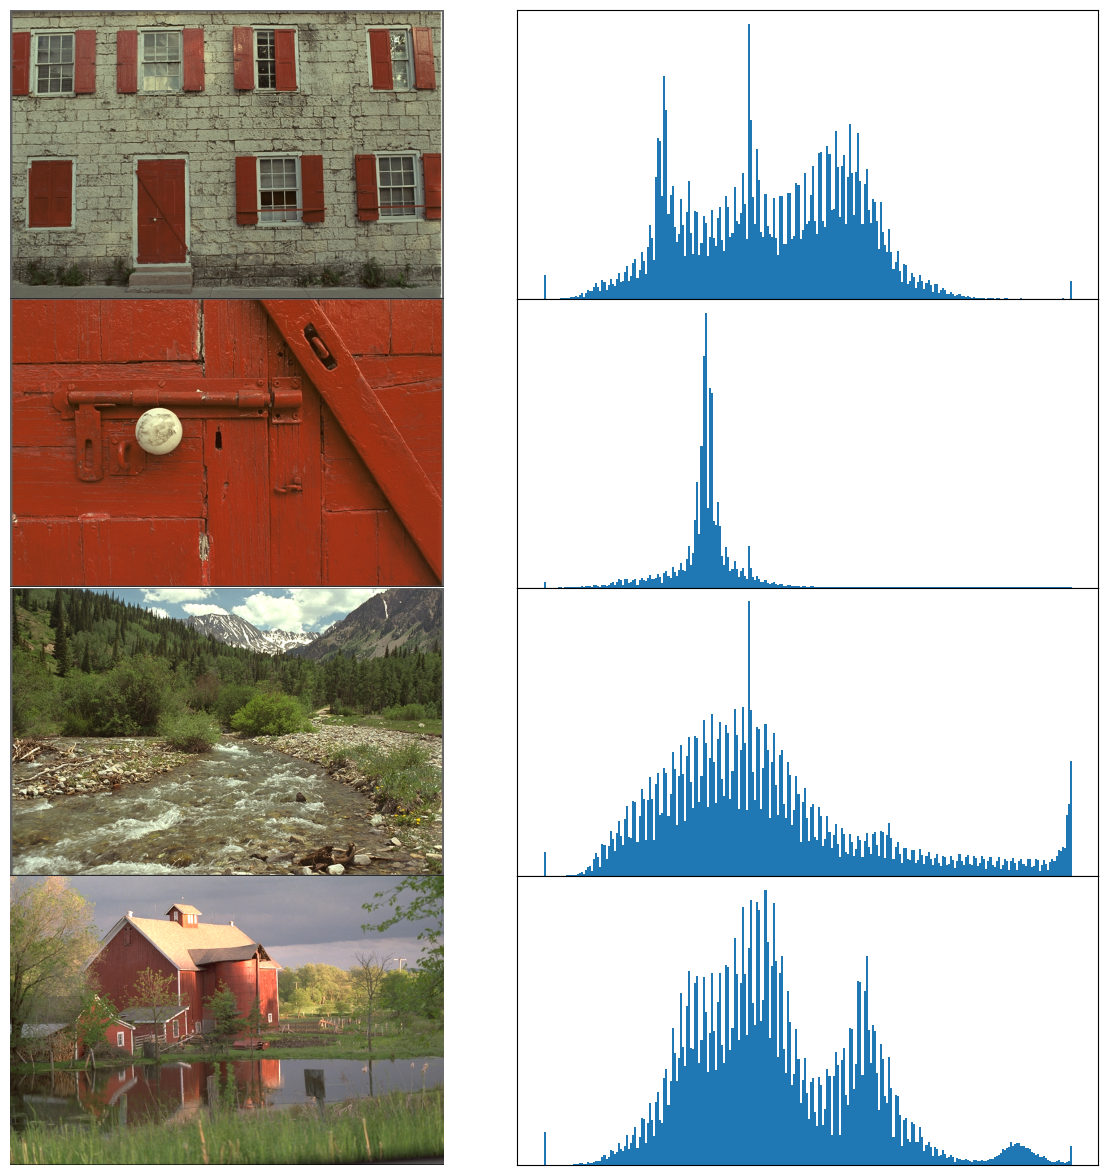

In [18]:
# plot images and its histogram together
fig, axs = plt.subplots(4, 2, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})
j=0

for i in [1,2,13, 22]:
    img_path = f'./img/{i}.png'
    img = plt.imread(img_path)

    img_bw = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]
    axs[j,0].imshow(img)
    axs[j,0].axis('off')
    axs[j,0].set_aspect('equal')
    axs[j,1].hist(img_bw.flatten(), bins=256, range=(0, 1))
    axs[j,1].set_aspect('auto')
    axs[j,1].set_yticks([])
    axs[j,1].set_xticks([])
    j+=1

# save
plt.savefig('img_hist.png', bbox_inches='tight', pad_inches=0)


In [14]:
def get_bw_noise (img):
    bw_img = 0.299*img[:,:,0] + 0.587*img[:,:,1] + 0.114*img[:,:,2]

    noise = np.random.normal(0, 0.1, bw_img.shape)
    bw_img_low_noise = bw_img + noise

    mid_noise = np.random.normal(0, 0.3, bw_img.shape)
    bw_img_mid_noise = bw_img + mid_noise

    high_noise = np.random.normal(0, 0.5, bw_img.shape)
    bw_img_high_noise = bw_img + high_noise
    return  bw_img, bw_img_low_noise, bw_img_mid_noise, bw_img_high_noise


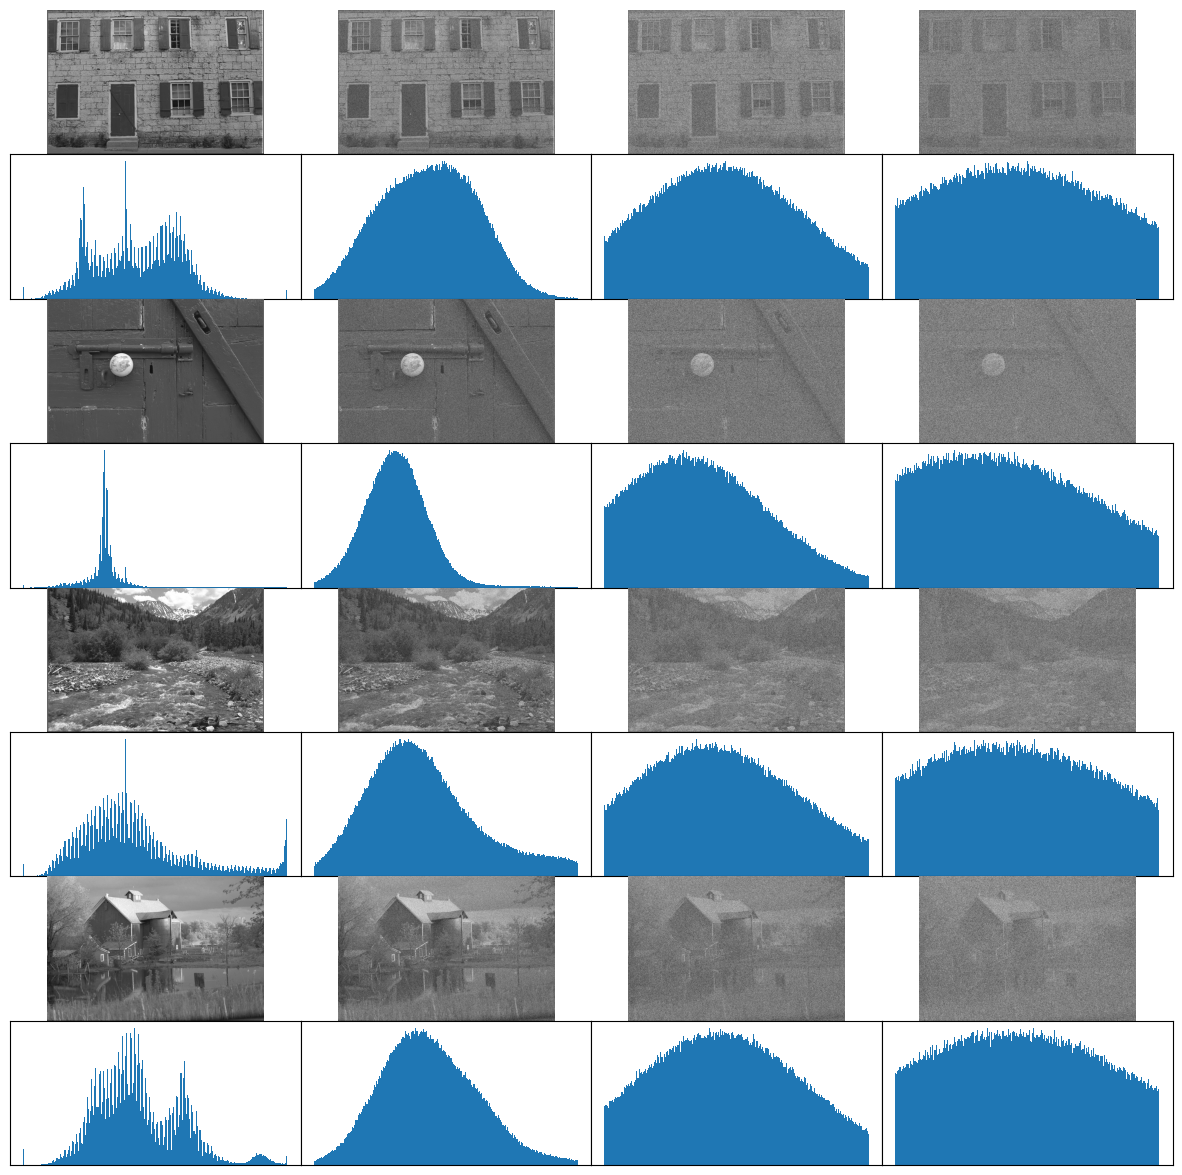

In [20]:
# plot images and its histogram together
fig, axs = plt.subplots(8, 4, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})
k=0

for i in [1,2,13, 22]:
    img_path = f'./img/{i}.png'
    img = plt.imread(img_path)

    bw_img, bw_img_low_noise, bw_img_mid_noise, bw_img_high_noise = get_bw_noise(img)

    imgs = [bw_img, bw_img_low_noise, bw_img_mid_noise, bw_img_high_noise]

    for j in range(4):
        axs[k,j].imshow(imgs[j], cmap='gray')
        axs[k,j].axis('off')
        axs[k,j].set_aspect('equal')

    # plot histogram of each image 
    
    for j in range(4):
        axs[k+1,j].hist(imgs[j].flatten(), bins=256, range=(0, 1))
        axs[k+1,j].set_aspect('auto')
        axs[k+1,j].set_yticks([])
        axs[k+1,j].set_xticks([])

    k+=2
# save
plt.savefig('img_hist_noise.png', bbox_inches='tight', pad_inches=0)


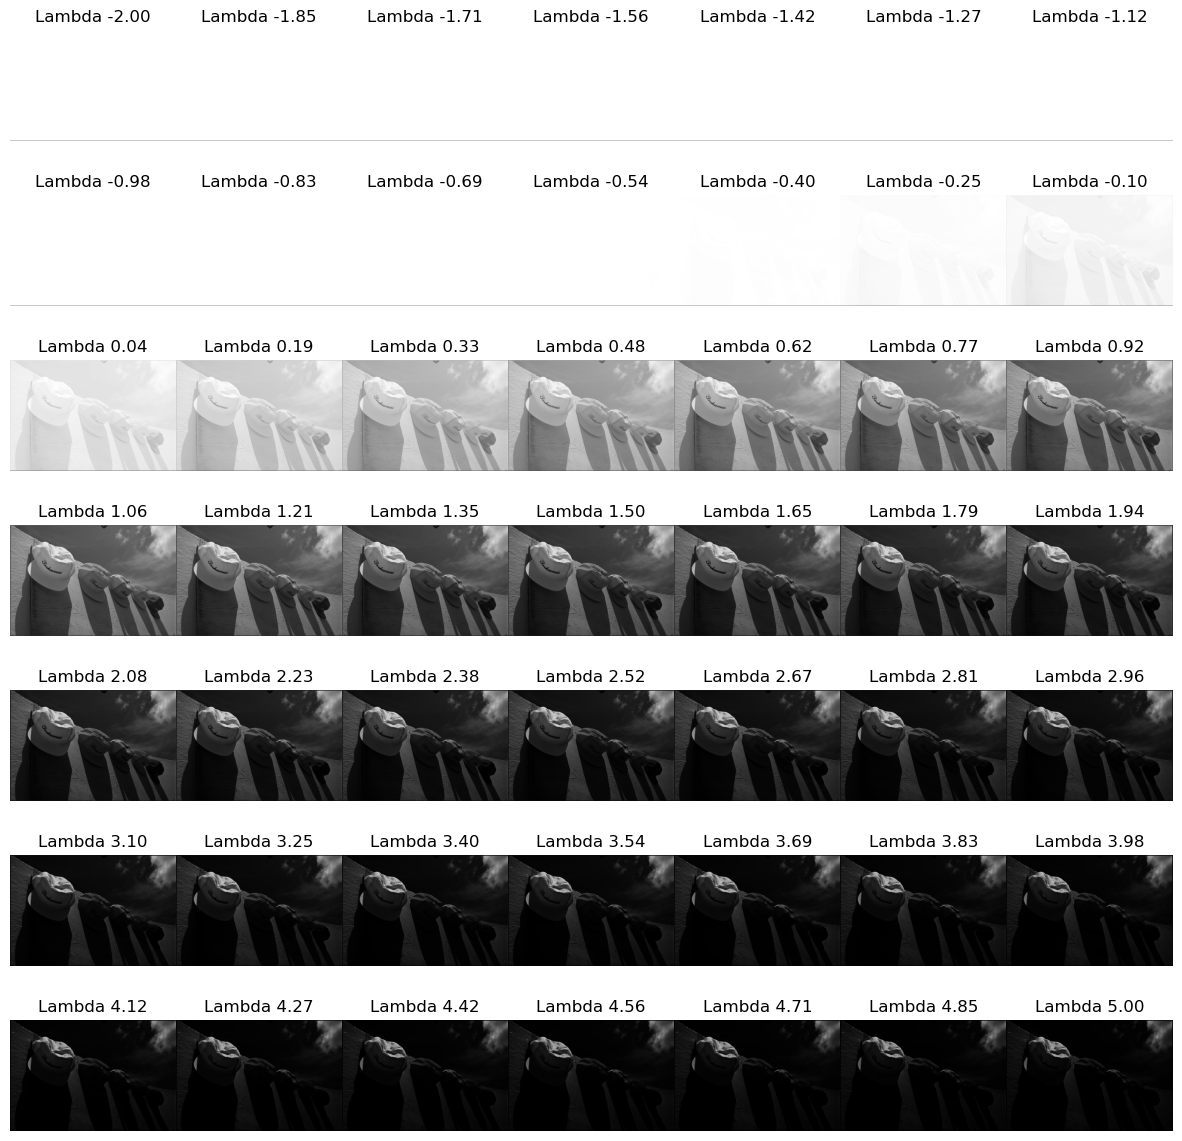

In [30]:
import sys
sys.path.append('../boxcox')

i = 3
from box_cox_img import BoxCoxImg
img_path = f'./img/{i}.png'

fig, axs = plt.subplots(7, 7, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})

axs = axs.flatten()

i=0

BCI = BoxCoxImg(img_path)
for lmbda in np.linspace(-2, 5, 49):
    full_bc = BCI.transform(method='full', lam= lmbda)
    axs[i].imshow(full_bc, cmap='gray')
    axs[i].axis('off')
    axs[i].set_aspect('equal')
    # add title
    axs[i].set_title(f'Lambda {lmbda:.2f}')
    i+=1


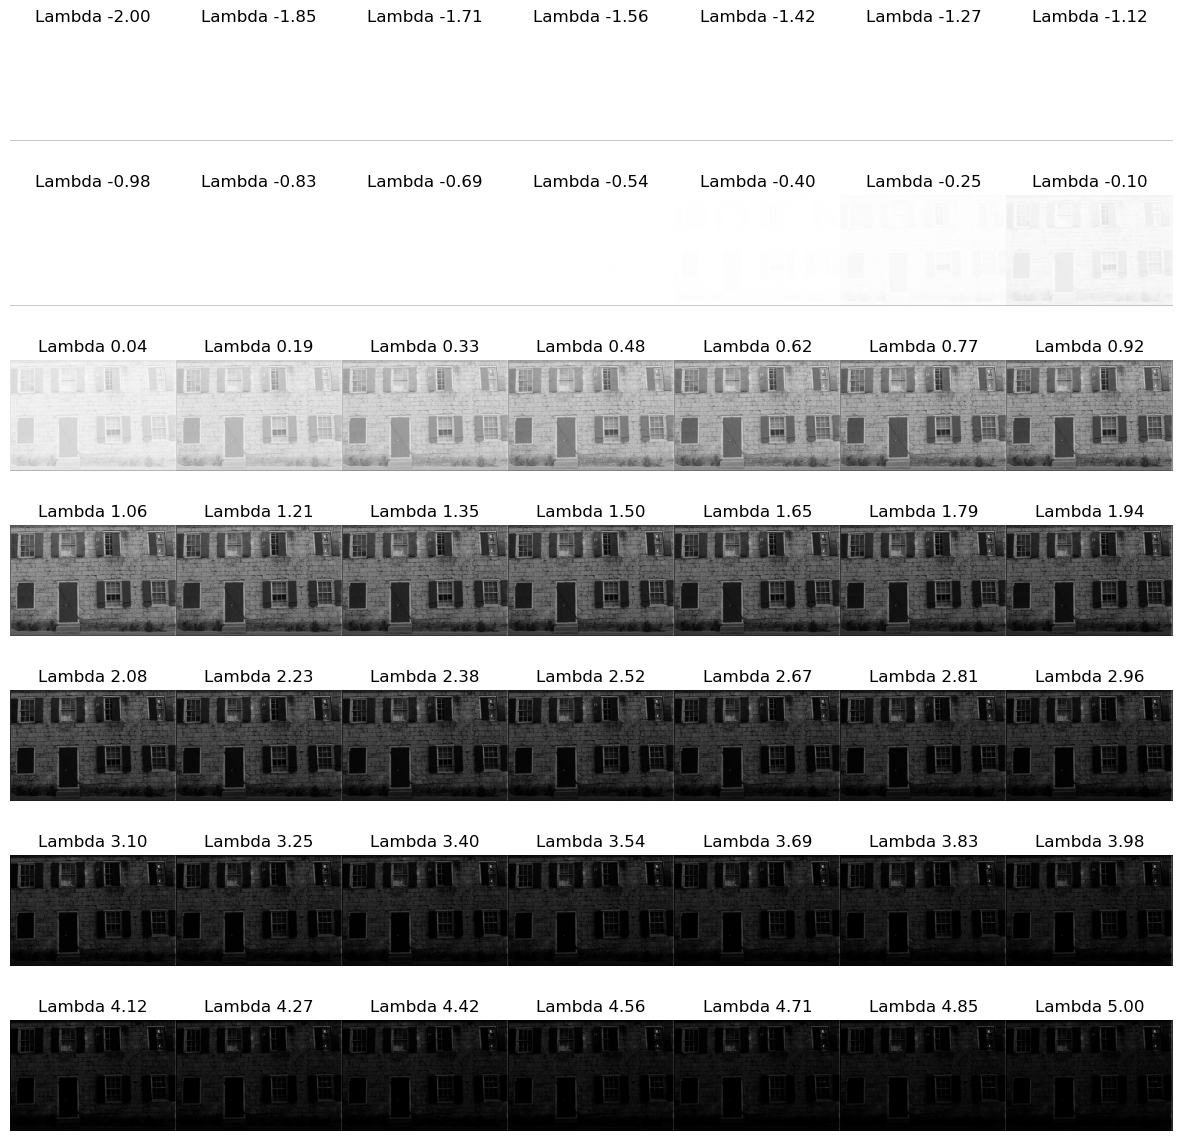

In [31]:
import sys
sys.path.append('../boxcox')

i = 1
from box_cox_img import BoxCoxImg
img_path = f'./img/{i}.png'

fig, axs = plt.subplots(7, 7, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})

axs = axs.flatten()

i=0

BCI = BoxCoxImg(img_path)
for lmbda in np.linspace(-2, 5, 49):
    full_bc = BCI.transform(method='full', lam= lmbda)
    axs[i].imshow(full_bc, cmap='gray')
    axs[i].axis('off')
    axs[i].set_aspect('equal')
    # add title
    axs[i].set_title(f'Lambda {lmbda:.2f}')
    i+=1


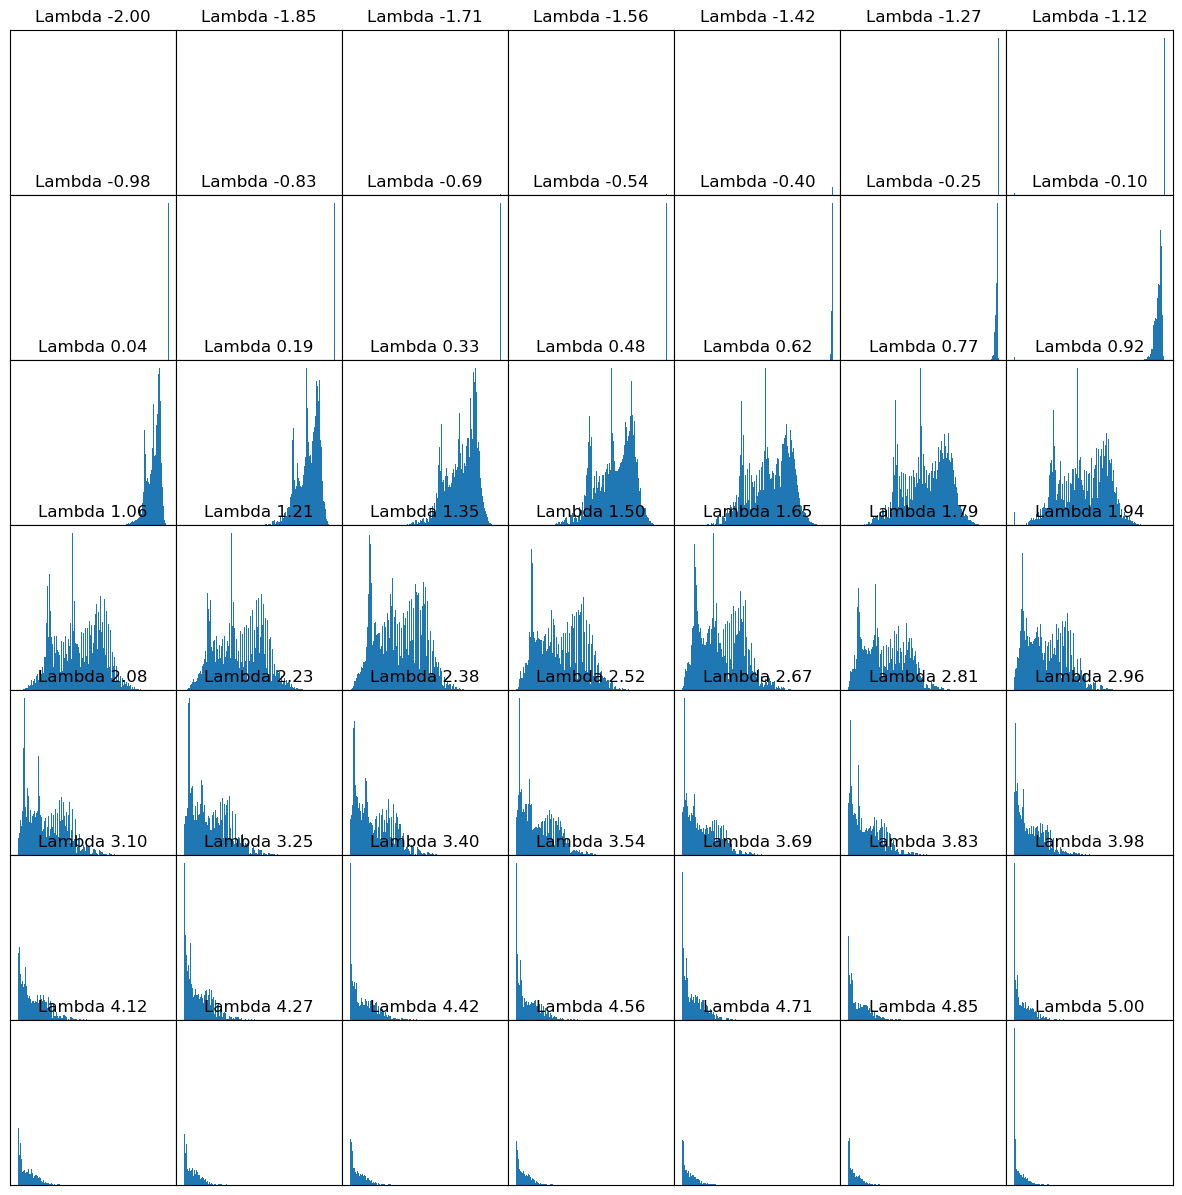

In [37]:
import sys
sys.path.append('../boxcox')

i = 1
from box_cox_img import BoxCoxImg
img_path = f'./img/{i}.png'

fig, axs = plt.subplots(7, 7, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})

axs = axs.flatten()

i=0

BCI = BoxCoxImg(img_path)
for lmbda in np.linspace(-2, 5, 49):
    full_bc = BCI.transform(method='full', lam= lmbda)
    # plot histogram of each image
    axs[i].hist(full_bc.flatten(), bins=256, range=(0, 1))
    # axs[i].set_aspect('auto')
    axs[i].set_yticks([])
    axs[i].set_xticks([])
    #separete plots so they dont overlap

    # add title
    axs[i].set_title(f'Lambda {lmbda:.2f}')
    i+=1

#separete plots so they dont overlap
fig.subplots_adjust(wspace=0, hspace=0.5)

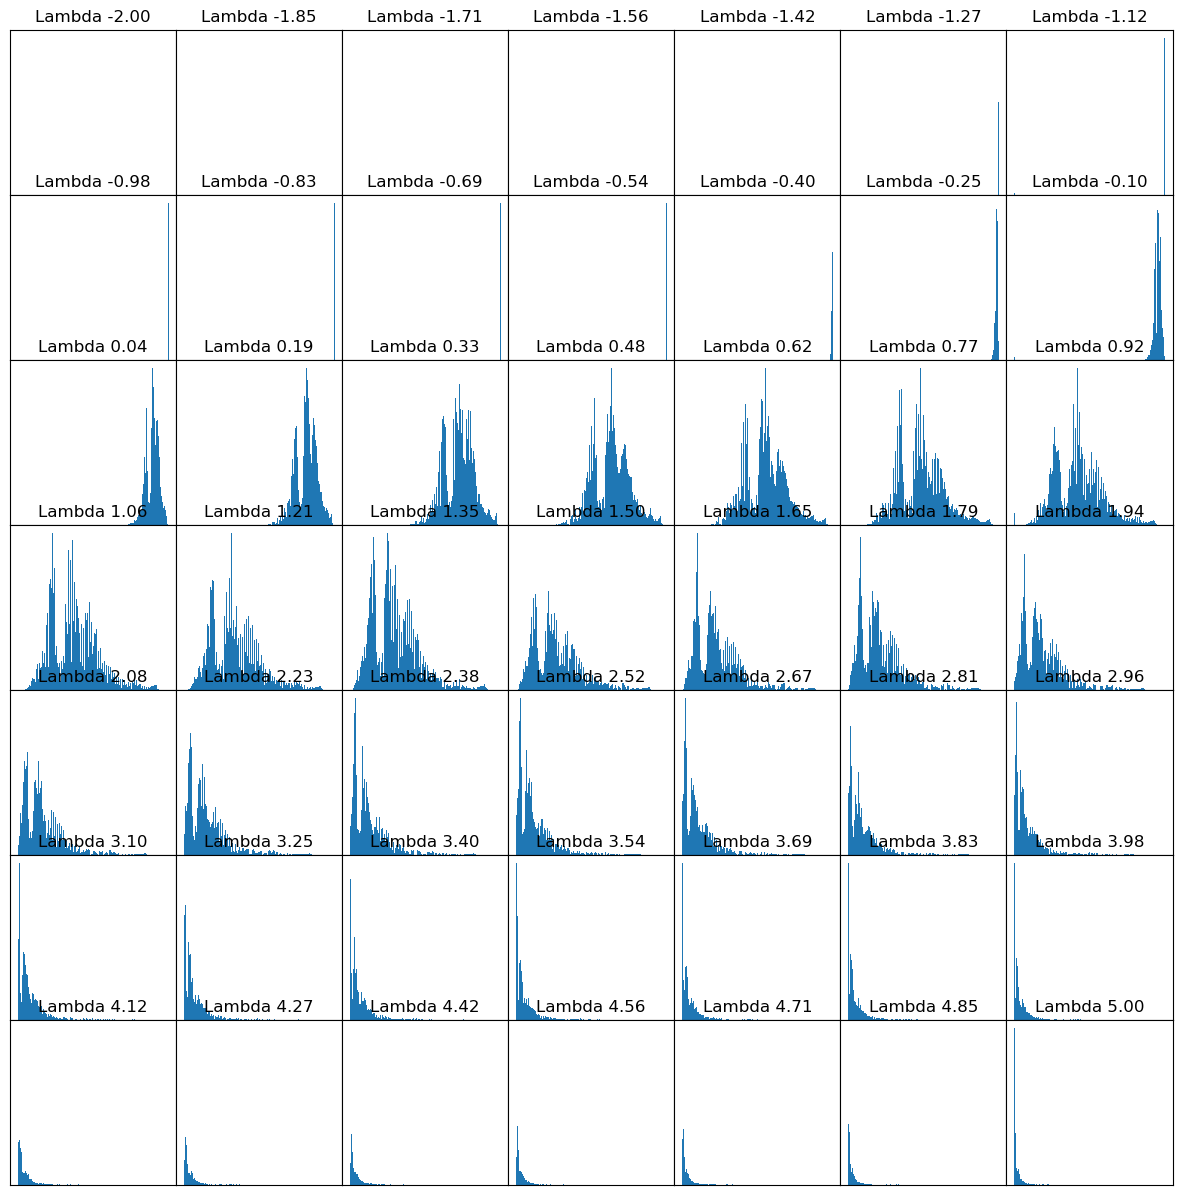

In [38]:
import sys
sys.path.append('../boxcox')

i = 3
from box_cox_img import BoxCoxImg
img_path = f'./img/{i}.png'

fig, axs = plt.subplots(7, 7, figsize=(15, 15), gridspec_kw = {'wspace':0, 'hspace':0})

axs = axs.flatten()

i=0

BCI = BoxCoxImg(img_path)
for lmbda in np.linspace(-2, 5, 49):
    full_bc = BCI.transform(method='full', lam= lmbda)
    # plot histogram of each image
    axs[i].hist(full_bc.flatten(), bins=256, range=(0, 1))
    axs[i].set_aspect('auto')
    axs[i].set_yticks([])
    axs[i].set_xticks([])    
    # add title
    axs[i].set_title(f'Lambda {lmbda:.2f}')
    i+=1
